Import libraries

In [ ]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

COCO routes and loads

In [ ]:
# مسیرها
DATA_ROOT = "C:/Users/KimiaMalekizadeh/Downloads/VISO/coco/car"
IMG_DIR = os.path.join(DATA_ROOT, "train2017")
ANN_PATH = os.path.join(DATA_ROOT, "Annotations", "instances_train2017_small.json")

# لود فایل annotation
with open(ANN_PATH, "r") as f:
    coco = json.load(f)

images = coco["images"]
annotations = coco["annotations"]

print("Images:", len(images))
print("Annotations:", len(annotations))


Images: 50
Annotations: 3267


Choose a sample image

In [ ]:
# انتخاب تصادفی یک تصویر
img_info = images[0]   
img_id = img_info["id"]
img_name = img_info["file_name"]

img_path = os.path.join(IMG_DIR, img_name)
print("Image path:", img_path)


Image path: C:/Users/KimiaMalekizadeh/Downloads/VISO/coco/car\train2017\006393.jpg


Load and display image

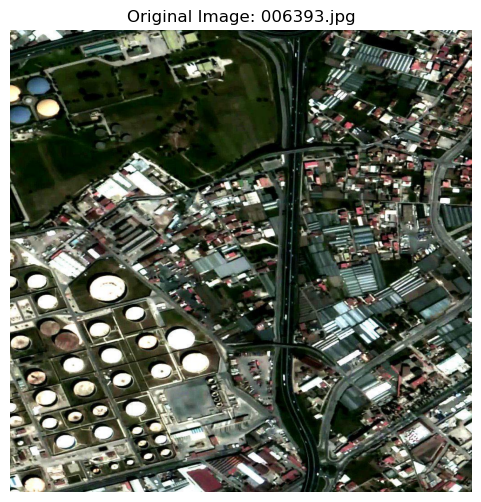

In [5]:
img = cv2.imread(img_path)

# OpenCV -> RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Original Image: {img_name}")
plt.show()


Extract annotations related to this image

In [ ]:
img_anns = [ann for ann in annotations if ann["image_id"] == img_id]

print("Number of objects in image:", len(img_anns))


Number of objects in image: 73


Drawing bounding boxes on an image

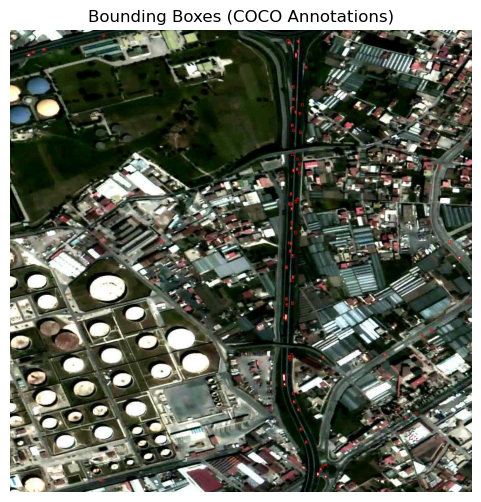

In [7]:
img_bbox = img_rgb.copy()

for ann in img_anns:
    x, y, w, h = ann["bbox"]
    x, y, w, h = map(int, [x, y, w, h])
    
    cv2.rectangle(
        img_bbox,
        (x, y),
        (x + w, y + h),
        (255, 0, 0),
        1
    )

plt.figure(figsize=(6,6))
plt.imshow(img_bbox)
plt.axis("off")
plt.title("Bounding Boxes (COCO Annotations)")
plt.show()


Creating a Binary Mask from Bounding Boxes

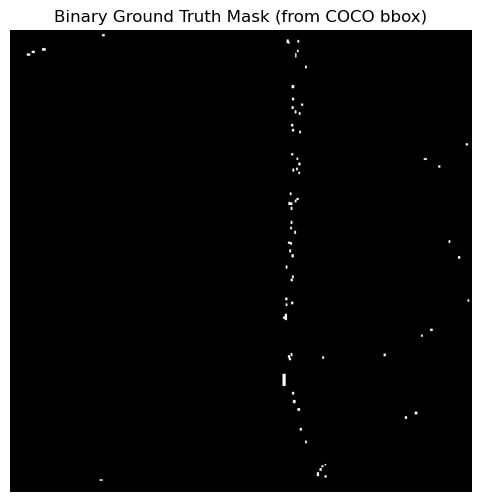

In [8]:
mask = np.zeros((img_info["height"], img_info["width"]), dtype=np.uint8)

for ann in img_anns:
    x, y, w, h = map(int, ann["bbox"])
    mask[y:y+h, x:x+w] = 1

plt.figure(figsize=(6,6))
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.title("Binary Ground Truth Mask (from COCO bbox)")
plt.show()


Image overlay and mask

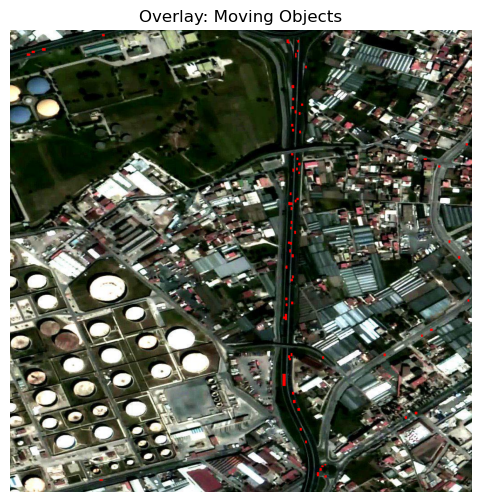

In [9]:
overlay = img_rgb.copy()
overlay[mask == 1] = [255, 0, 0]  # قرمز

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.axis("off")
plt.title("Overlay: Moving Objects")
plt.show()
